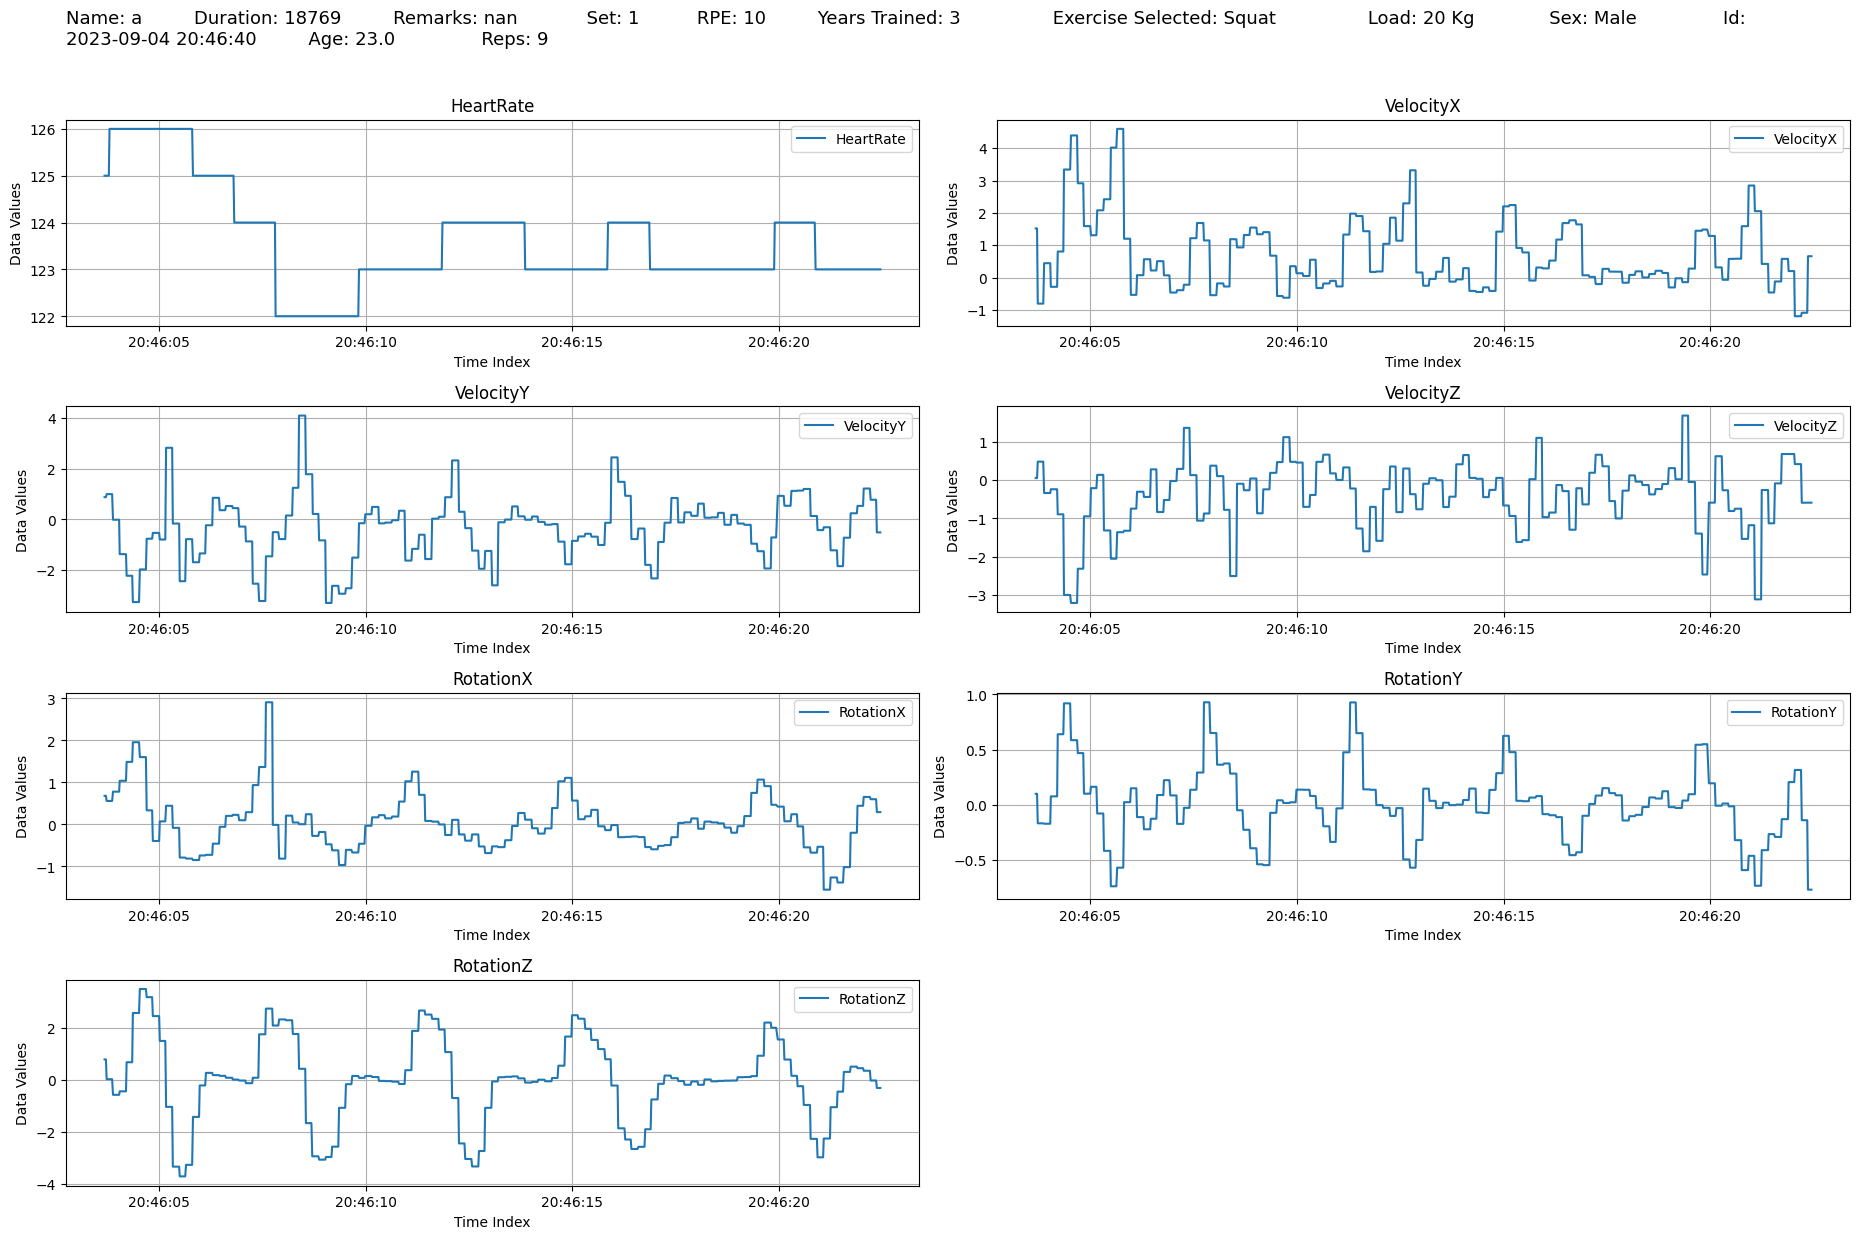

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.gridspec as gridspec
import textwrap
import os

def load_data(file_path, column_time):
    df = pd.read_csv(file_path)
    
    # Remove rows where TimeIndice is NaN
    df = df[df[column_time].notna()]
    
    return df

def extract_timestamps(df, column_time, record_index):
    series_time = df[column_time].iloc[record_index]
    timestamps = [datetime.strptime(x.strip(), '%H:%M:%S.%f') for x in series_time.split(';') if x.strip()]
    
    return timestamps

def plot_data(df, timestamps, columns, record_index):
    n = len(columns)
    n_rows = (n + 1) // 2
    
    gs = gridspec.GridSpec(n_rows + 1, 2, height_ratios=[0.1] + [1]*n_rows)
    fig = plt.figure(figsize=(20, 2.5 * (n_rows + 1)))
    
    ax_text = fig.add_subplot(gs[0, :])
    ax_text.axis('off')
    
    all_columns = set(df.columns)
    plottable_columns = set(columns + [column_time])
    info_columns = list(all_columns - plottable_columns)
    
    if info_columns:
        info_text = "\t\t".join([f"{col}: {df[col].iloc[record_index]}" for col in info_columns])
        wrapped_text = textwrap.fill(info_text, width=220)
        ax_text.text(0, 0.5, wrapped_text, ha='left', va='center', fontsize=13)
    
    axs = [fig.add_subplot(gs[i+1, j]) for i in range(n_rows) for j in range(2)]
    
    for idx, ax in enumerate(axs[:n]):
        column = columns[idx]
        series_data = df[column].iloc[record_index]
        data_values = [float(x.strip()) for x in series_data.split(';') if x.strip()]

        ax.plot(timestamps, data_values, label=column)
        ax.set_title(column)
        ax.set_xlabel('Time Index')
        ax.set_ylabel('Data Values')
        ax.grid(True)
        ax.legend()
        
    if n % 2 != 0:
        axs[-1].axis('off')
        
    plt.tight_layout()
    plt.show()

# Get a list of CSV files in the current directory
csv_files = [file for file in os.listdir('./') if file.endswith('.csv')]

# Initialize an empty dataframe to store concatenated data
all_data = pd.DataFrame()

# Iterate over CSV files and concatenate them
for file_path in csv_files:
    df = load_data(file_path, column_time)
    all_data = pd.concat([all_data, df], ignore_index=True)

# Remove duplicates based on all columns except "Id"
all_data = all_data.drop_duplicates(subset=all_data.columns.difference(['Id']))

# Sort the concatenated dataframe based on the "Id" column
all_data['Id'] = pd.to_datetime(all_data['Id'])
all_data = all_data.sort_values(by='Id')

# Reset the index after sorting
all_data = all_data.reset_index(drop=True)

# Extract timestamps and plot the data
timestamps = extract_timestamps(all_data, column_time, record_index)
plot_data(all_data, timestamps, time_series_columns, record_index)



In [115]:
all_data.loc[:,['Set', 'Name', 'Exercise Selected', 'Load', 'Reps', 'RPE', 'Remarks', 'Duration', 'Id']]

,Set,Name,Exercise Selected,Load,Reps,RPE,Remarks,Duration,Id
0,1,Kalki Lamadrid,Deadlift,21 Kg,12,3-4,NaN,47658,2023-09-01 22:08:52
1,1,Kalki Lamadrid,Deadlift,21 Kg,12,3-4,NaN,47586,2023-09-01 22:09:20
2,1,Kalki,Back Rows,21 Lb,10,5-6,NaN,43633,2023-09-01 22:12:42
3,1,Kalki,Back Rows,21 Lb,10,5-6,NaN,43615,2023-09-01 22:13:06
4,1,Kalki,Bicep Curl,21 Kg,12,7,NaN,50712,2023-09-01 22:18:27
...,...,...,...,...,...,...,...,...,...
101,1,k,Squat,20 Kg,16,7.5,NaN,39196,2023-09-04 20:43:25
102,1,b,Squat,10 Kg,21,9,NaN,46377,2023-09-04 20:44:49
103,1,r,Squat,10 Kg,15,10,NaN,32792,2023-09-04 20:45:45
104,1,a,Squat,20 Kg,9,10,NaN,18769,2023-09-04 20:46:40


In [116]:
all_data

,Set,TimeIndice,HeartRate,VelocityX,VelocityY,VelocityZ,RotationX,RotationY,RotationZ,Id,Exercise Selected,Load,Reps,Name,Sex,Years Trained,Age,RPE,Duration,Remarks
0,1,22:07:05.296;22:07:05.316;22:07:05.330;22:07:0...,120.0;120.0;120.0;120.0;120.0;120.0;120.0;120....,0.15083;0.15083;0.15083;0.15083;0.15083;0.1508...,0.00958;0.00958;0.00958;0.00958;0.00958;0.0095...,0.04549;0.04549;0.04549;0.04549;0.04549;0.0454...,0.09163;0.09163;0.09163;0.09163;0.09163;0.0916...,0.00733;0.00733;0.00733;0.00733;0.00733;0.0073...,-0.05498;-0.05498;-0.05498;-0.05498;-0.05498;-...,2023-09-01 22:08:52,Deadlift,21 Kg,12,Kalki Lamadrid,Male,5,22.0,3-4,47658,NaN
1,1,22:07:08.040;22:07:08.056;22:07:08.075;22:07:0...,112.0;112.0;112.0;112.0;112.0;113.0;113.0;113....,-0.11492;-0.11492;-0.11492;-0.11492;-0.11492;-...,0.14844;0.14844;0.14844;0.14844;0.14844;0.1484...,0.08859;0.08859;0.08859;0.08859;0.08859;0.0885...,0.07575;0.07575;0.07575;0.07575;0.07575;0.0757...,-0.00977;-0.00977;-0.00977;-0.00977;-0.00977;-...,-0.06842;-0.06842;-0.06842;-0.06842;-0.06842;-...,2023-09-01 22:09:20,Deadlift,21 Kg,12,Kalki Lamadrid,Male,5,22.0,3-4,47586,NaN
2,1,22:11:20.786;22:11:20.801;22:11:20.820;22:11:2...,103.0;103.0;103.0;103.0;103.0;103.0;103.0;103....,-0.23463;-0.23463;-0.23463;-0.23463;-0.23463;-...,-0.13168;-0.13168;-0.13168;-0.13168;-0.13168;-...,-0.03591;-0.03591;-0.03591;-0.03591;-0.03591;-...,-0.09774;-0.09774;-0.09774;-0.09774;-0.09774;-...,-0.01833;-0.01833;-0.01833;-0.01833;-0.01833;-...,-0.06231;-0.06231;-0.06231;-0.06231;-0.06231;-...,2023-09-01 22:12:42,Back Rows,21 Lb,10,Kalki,Male,5,22.0,5-6,43633,NaN
3,1,22:11:23.380;22:11:23.397;22:11:23.413;22:11:2...,101.0;101.0;101.0;101.0;101.0;101.0;101.0;101....,-0.42617;-0.42617;-0.42617;-0.42617;-0.42617;-...,0.01915;0.01915;0.01915;0.01915;0.01915;0.0191...,-0.34477;-0.34477;-0.34477;-0.34477;-0.34477;-...,0.32376;0.32376;0.32376;0.32376;0.32376;0.3237...,-0.01344;-0.01344;-0.01344;-0.01344;-0.01344;-...,-0.04032;-0.04032;-0.04032;-0.04032;-0.04032;-...,2023-09-01 22:13:06,Back Rows,21 Lb,10,Kalki,Male,5,22.0,5-6,43615,NaN
4,1,22:17:18.364;22:17:18.380;22:17:18.396;22:17:1...,101.0;101.0;101.0;101.0;101.0;101.0;101.0;101....,-0.22266;-0.22266;-0.22266;-0.22266;-0.22266;-...,0.18435;0.18435;0.18435;0.18435;0.18435;0.1843...,0.60094;0.60094;0.60094;0.60094;0.60094;0.6009...,0.38729;0.38729;0.38729;0.38729;0.38729;0.3872...,-0.05986;-0.05986;-0.05986;-0.05986;-0.05986;-...,-0.11362;-0.11362;-0.11362;-0.11362;-0.11362;-...,2023-09-01 22:18:27,Bicep Curl,21 Kg,12,Kalki,Male,5,22.0,7,50712,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,1,20:42:24.433;20:42:24.453;20:42:24.467;20:42:2...,104.0;104.0;104.0;104.0;104.0;104.0;104.0;104....,-0.56503;-0.56503;-0.56503;-0.56503;-0.56503;-...,-0.24181;-0.24181;-0.24181;-0.24181;-0.24181;-...,0.54348;0.54348;0.54348;0.54348;0.54348;0.5434...,-0.05498;-0.05498;-0.05498;-0.05498;-0.05498;-...,0.09529;0.09529;0.09529;0.09529;0.09529;0.0952...,0.21625;0.21625;0.21625;0.21625;0.21625;0.2162...,2023-09-04 20:43:25,Squat,20 Kg,16,k,Male,8,22.0,7.5,39196,NaN
102,1,20:43:43.874;20:43:43.892;20:43:43.907;20:43:4...,111.0;111.0;111.0;111.0;111.0;111.0;111.0;111....,0.30406;0.30406;0.30406;0.30406;0.30406;1.1516...,-0.2897;-0.2897;-0.2897;-0.2897;-0.2897;0.4189...,-0.81403;-0.81403;-0.81403;-0.81403;-0.81403;-...,-0.18448;-0.18448;-0.18448;-0.18448;-0.18448;0...,0.70494;0.70494;0.70494;0.70494;0.70494;0.4520...,0.25412;0.25412;0.25412;0.25412;0.25412;0.1050...,2023-09-04 20:44:49,Squat,10 Kg,21,b,Male,3,22.0,9,46377,NaN
103,1,20:44:56.947;20:44:56.965;20:44:56.983;20:44:5...,109.0;109.0;109.0;109.0;109.0;109.0;109.0;109....,-2.54264;-2.54264;-2.54264;-2.54264;-2.54264;-...,-1.32639;-1.32639;-1.32639;-1.32639;-1.32639;-...,-1.58496;-1.58496;-1.58496;-1.58496;-1.58496;-...,-0.30421;-0.30421;-0.30421;-0.30421;-0.30421;-...,0.34819;0.34819;0.34819;0.34819;0.34819;0.3481...,0.00367;0.00367;0.00367;0.00367;0.00367;0.0036...,2023-09-04 20:45:45

In [117]:
filtered_df = all_data[all_data['Remarks'].notnull()]

# Display only the "Remarks" column
print(filtered_df['Remarks'])


17          55555
24    hello world
25    hello world
26     late start
Name: Remarks, dtype: object
